**Apprentissage** **supervise**

Classification image

**MNIST DATASET - RESEAU NEURONE**

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

In [72]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [73]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [74]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


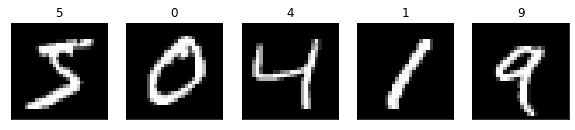

In [75]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

[0,0,0,0,1,0,0,0]

Vous pouvez voir ici que la sortie est un simple tableau qui a des valeurs entièrement nulles à l'exception de la valeur de l'index 3. Et c'est tout. Une telle représentation est appelée codage à chaud.

In [76]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

d'encoder à chaud toutes les étiquettes cibles (à la fois y_train et y_test)

In [77]:
# Convertir y_train en format one-hot 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10)) # parcourir la liste de y_train y:label et il encode 

In [78]:
y_train = np.array(temp) # transforme l'encodage dans la liste en array tableau

Maintenant que nous pouvons vérifier la nouvelle forme de y_train 

In [79]:
print(y_train.shape)


(60000, 10)


In [80]:
# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

Maintenant que nous pouvons vérifier la nouvelle forme de y_test 

In [81]:
print(y_test.shape)

(10000, 10)


## Construction de Modele Reseau Neurone

La première chose à faire est d'initialiser un modèle séquentiel

In [82]:
# Créer un modèle de réseau neuronal simple
model = Sequential()


Ensuite, nous sommes maintenant en mesure d'y ajouter des couches. Ici, je commence le modèle de réseau de neurones avec une couche Flatten car nous devons remodeler l'image de 28 par 28 pixels (2 dimensions) en 784 valeurs (1 dimension).

In [83]:
model.add(Flatten(input_shape=(28,28))) # transforme array 2 dimension a 1 dimensio 28*28=784


Ensuite, nous connectons ces 784 valeurs en 5 neurones avec une fonction d'activation sigmoïde. En fait, je peux choisir librement n'importe quel nombre de neurones pour cette couche, mais comme je veux que le modèle de réseau de neurones soit simple et rapide à former, je choisis juste 5 neurones pour ce cas.

In [84]:
model.add(Dense(5, activation='sigmoid'))


La dernière chose à ajouter est une autre couche dense (ici j'utilise la fonction d'activation softmax) qui agit comme notre couche de sortie. Dans la dernière couche, nous devons utiliser 10 neurones car notre tâche de classification comporte 10 classes différentes.


In [85]:
model.add(Dense(10, activation='softmax'))

summary : indique les détails des couches à l'intérieur de notre réseau de neurones

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 5)                 3925      
                                                                 
 dense_7 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


- nous passons **l'entropie croisée catégorique** pour l'argument de la fonction de perte car c'est juste le meilleur à utiliser dans le problème de classification multiclasse. 

- Ensuite, nous utilisons **l'optimiseur Adam** car c'est aussi le meilleur dans la plupart des cas. 

- Enfin, nous avons la précision à passer dans l'argument des métriques afin de mesurer les performances de notre classifieur.

In [87]:
model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

## Entrainer le modèle de réseau de neurones

In [88]:
# Entrainer le modèle de réseau de neurones
model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7333 - acc: 0.4642 - val_loss: 1.3274 - val_acc: 0.6291
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1993 - acc: 0.6432 - val_loss: 1.1153 - val_acc: 0.6452
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0258 - acc: 0.6779 - val_loss: 0.9552 - val_acc: 0.6965
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9557 - acc: 0.6949 - val_loss: 0.9283 - val_acc: 0.6977
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9057 - acc: 0.7047 - val_loss: 0.8759 - val_acc: 0.7154


nous pouvons voir que la précision **accuracy** augmente (à la fois pour la trainning et les données de test) dans notre processus de  training à 5 itérations. 

un modèle de réseau de neurones relativement simple permet d'obtenir environ 75% de **précision** 

In [89]:
predictions = model.predict(X_test)
print(predictions)

313/313 [==============================] - 0s 1ms/step
[[3.10668373e-03 1.16263946e-04 1.53806363e-03 ... 4.61138695e-01
  4.46829060e-03 4.05616134e-01]
 [3.73790041e-02 6.64353790e-03 7.53539860e-01 ... 5.59928780e-03
  2.94929231e-03 1.38955505e-03]
 [2.00451259e-02 8.17937374e-01 2.72555575e-02 ... 3.51186749e-03
  4.72541228e-02 5.44094434e-03]
 ...
 [1.24306433e-04 5.88933453e-02 5.54542802e-03 ... 8.00085291e-02
  1.31543666e-01 1.55563205e-01]
 [1.65160350e-03 1.41377881e-01 2.68180808e-03 ... 6.92166714e-03
  6.77175224e-01 1.26748076e-02]
 [1.71137024e-02 4.87218909e-02 1.09422177e-01 ... 1.54488813e-02
  1.03933159e-02 6.62083412e-03]]


cette forme de sortie est (10000, 10) dans laquelle elle stocke la valeur de probabilité de classification de chaque échantillon.

In [90]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 8 6]


nous pouvons essayer d'imprimer des images avec ses prédictions

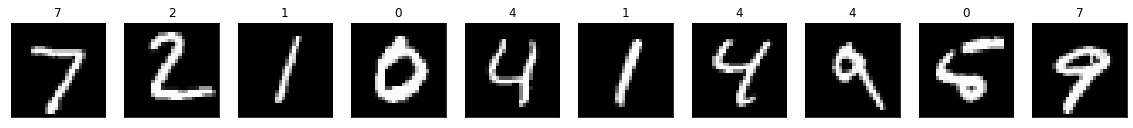

In [91]:
fig, axes = plt.subplots(ncols=11, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(11):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

L'image de sortie montre les 10 premières images de test ainsi que ses prédictions au-dessus de chacune de ces images numériques.

 je peux voir que la plupart de ces écritures sont classées correctement.